In [1]:
import numpy as np

from plotting.PlottingUtils import umapWithPCA, computeLatentEmbedding
from plotting.__init__ import *
from plotting.visualization import plotPredAllTime, plotPredTestTime
from dataset.dataset_utils import loadSCData

In [3]:
ann_data, cell_tps, cell_types, n_genes, n_tps = loadSCData("zebrafish", "three_interpolation")
data = ann_data.X
traj_data = [data[np.where(cell_tps == t)[0], :] for t in range(1, n_tps + 1)]

[ Data=zebrafish | Split=three_interpolation ] Loading data...


In [5]:
# Visualization - 2D UMAP embeddings
true_data = traj_data  # ground truth 


true_cell_tps = np.concatenate(
    [np.repeat(t, each.shape[0]) for t, each in enumerate(true_data)]
)


true_umap_traj, umap_model, pca_model = umapWithPCA(
    np.concatenate(true_data, axis=0), n_neighbors=50, min_dist=0.1, pca_pcs=50
)

: 

### 导入预测数据

In [ ]:
cell_traj = np.load('/mnt/sdb/hanyuji-data/wot_result/gene_traj_009.npy')

cell_traj.shape

(12, 9582, 2000)

In [ ]:
# 映射预测数据
reorder_pred_data = cell_traj  # (TimePonit, N, feature)


pred_cell_tps = np.concatenate(
    [np.repeat(t, each.shape[0]) for t, each in enumerate(reorder_pred_data)]
)

pred_umap_traj = umap_model.transform(
    pca_model.transform(np.concatenate(reorder_pred_data, axis=0))
)

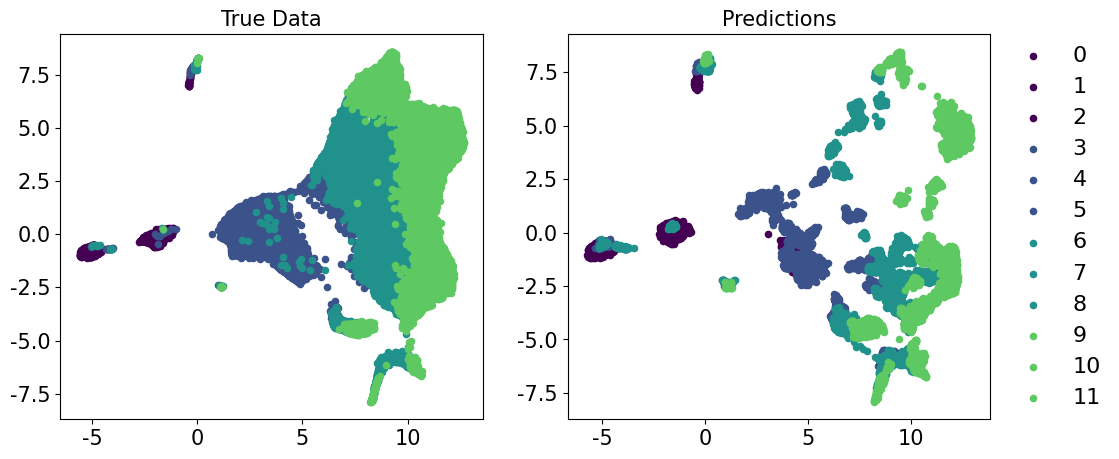

<Figure size 640x480 with 0 Axes>

In [ ]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

# 可视化
plotPredAllTime(true_umap_traj, pred_umap_traj, true_cell_tps, pred_cell_tps)

# 折线图

In [11]:
cell_traj = np.load('/mnt/sdb/hanyuji-data/wot_result/gene_traj_009.npy')
print(cell_traj.shape)
cell_traj = cell_traj.transpose(1,0,2)
print(cell_traj.shape)

(12, 9582, 2000)
(9582, 12, 2000)


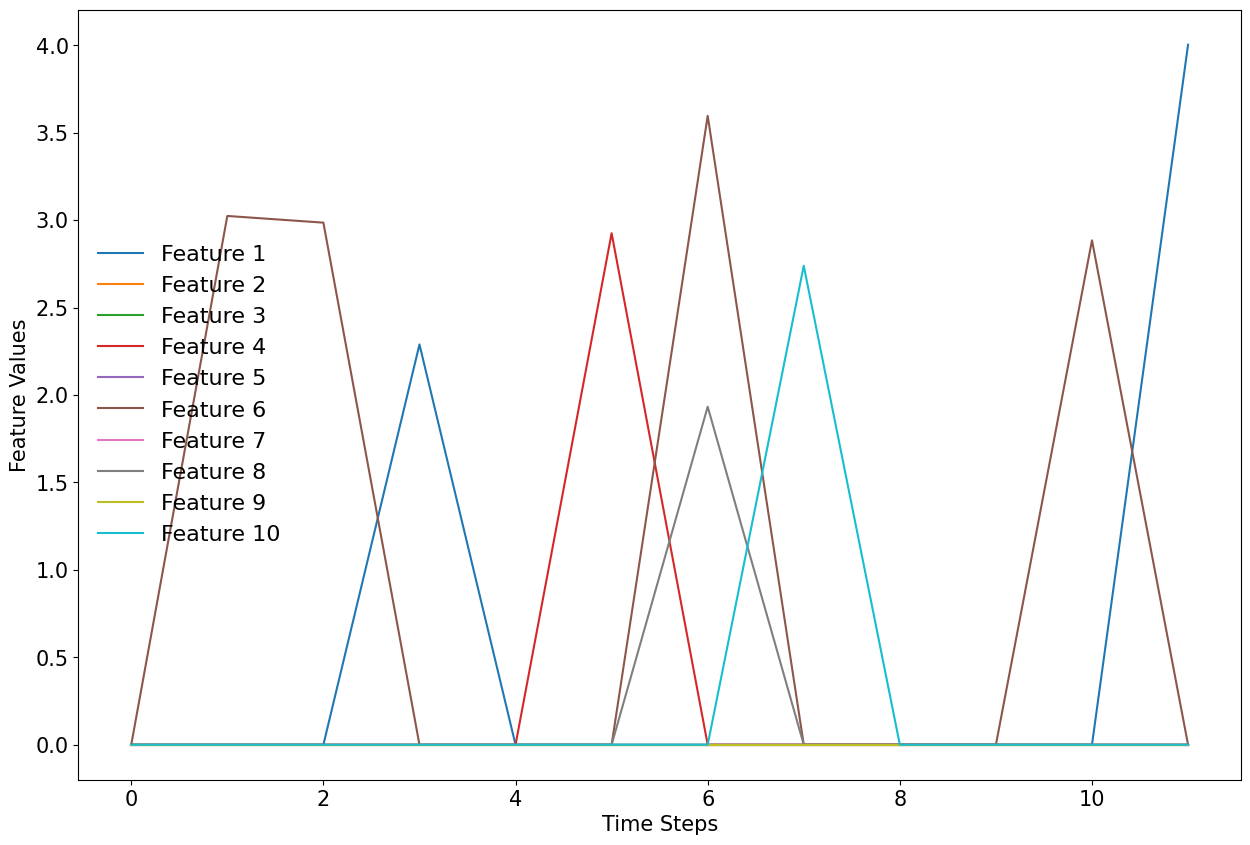

In [17]:
sequence = cell_traj[150]

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

# 绘制所有特征
plt.figure(figsize=(15, 10))

num_features = 10
# num_features = sequence.shape[1]


for i in range(num_features):
    plt.plot(sequence[:, i], label=f'Feature {i+1}')
    # feature_values = sequence[:, i]
    # plt.scatter(range(len(feature_values)), feature_values, label=f'Feature {i+1}')

plt.xlabel('Time Steps')
plt.ylabel('Feature Values')
plt.legend()
plt.show()